In [20]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

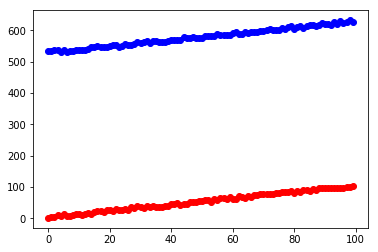

In [22]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

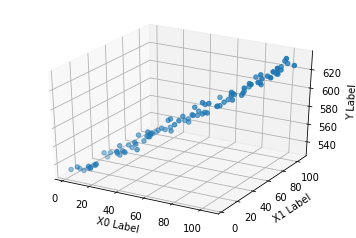

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()


In [26]:
def compute_cost(x, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

In [4]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(theta)
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum()
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [ ]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(
        x, y,theta_initial, 300000, 0.0001)
print("theta", theta)

In [37]:
from sklearn import  linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# # The coefficients
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)  

Coefficients:  [ 0.53940637  0.45448194]
intercept:  524.562563129


In [33]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

538.790702194
[ 538.79070235]


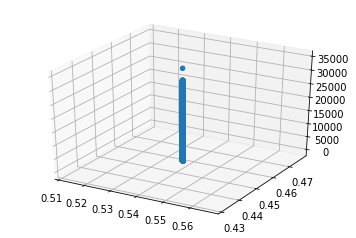

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0],theta_history[:,1], cost_history, zdir="z")


plt.show()

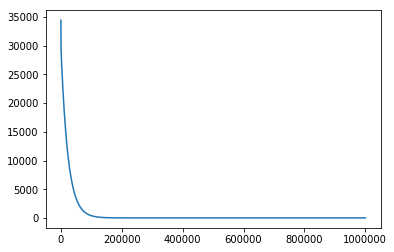

In [35]:
plt.plot(cost_history)
plt.show()